# <font size=20>Sprint 17: Final Project</font>

# <u>**Section 1: Exploratory Data Analysis, Clarifying Questions, Work Plan**</u>

## Introduction

### Overview

**The telecom operator Interconnect would like to be able to forecast their churn of clients.** If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

### Description of Data

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services
In each file, the column customerID contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

### Objective

To make a prototype of a machine learning model that will predict whether a user is planning to leave Interconnect based on historical data. 

The primary target feature will be `EndDate`. When `EndDate` is equal to 'No', this means that the user is still using Interconnect services. The model will be evaluated on AUC-ROC as the primary metric and accuracy as the additional metric. The acceptance criteria is that the model must have an AUC-ROC over 0.75, but over 0.88 is preferred.

## Preparation

### Import Libraries

In [1]:
# Import libraries required for this analysis
import numpy as np
import pandas as pd

# For displaying plots 
import seaborn as sns
import matplotlib.pyplot as plt

# For train test split
from sklearn.model_selection import train_test_split

# For scaling
from sklearn.preprocessing import StandardScaler

# For timing training/prediction
import time

# Grid Search CV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

# Accuracy score libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# From sklearn get classification models, model evaluation packages, and training data split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# https://lightgbm.readthedocs.io/en/stable/Python-Intro.html
from lightgbm import LGBMClassifier

# https://catboost.ai/en/docs/concepts/python-usages-examples
from catboost import CatBoostClassifier

#https://xgboost.readthedocs.io/en/stable/python/python_api.html
from xgboost import XGBClassifier

# Display all fields
pd.set_option('display.max_columns', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
# Read in data CSVs and convert to dataframes

# Contract
contract = pd.read_csv('/datasets/final_provider/contract.csv')

# Personal
personal = pd.read_csv('/datasets/final_provider/personal.csv')

# Internet
internet = pd.read_csv('/datasets/final_provider/internet.csv')

# Phone
phone = pd.read_csv('/datasets/final_provider/phone.csv')

## Exploratory Data Analysis

### Summary

In this section, I will:
- Explore each dataframe individually.
- Make corrections to column names, datatypes, missing or duplicate values, as needed.
- Develop new features based on existing ones to assist model training.
- Merge all four dataframes to create one dataset for model development.
- Explore newly merged dataframe again.

In [3]:
# Create a function to look at descriptive stats for each dataframe
def descriptive_stats(df):
    
    # Print dataframe head
    print('First five rows of dataframe')
    display(df.head())
    print()
    
    # Print dataframe sample
    print('Random five rows of dataframe')
    display(df.sample(5))
    print()
    
    # Check for missing values
    print('Check for Missing Values')
    print(df.isna().sum())
    print()

    # Check data types
    print('Check Data Types')
    print(df.info())
    print()

    # Check values for each column
    print('Describe Dataframe')
    print(df.describe(include = 'all'))
    print()
    
    # Check for Duplicates
    print('Count of Duplicated Rows')
    print(df.duplicated().sum())

### Contract Dataset

#### Overview

In [4]:
# Check descriptive_stats for Contract
descriptive_stats(contract)

First five rows of dataframe


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



Random five rows of dataframe


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6147,6383-ZTSIW,2016-11-01,No,One year,No,Mailed check,99.10,3877.95
6922,9398-MMQTO,2019-11-01,No,Month-to-month,No,Credit card (automatic),74.45,221.1
72,1891-QRQSA,2014-10-01,No,Two year,Yes,Bank transfer (automatic),111.60,7099
5770,6252-DFGTK,2017-01-01,No,One year,No,Credit card (automatic),68.10,2479.25
6995,7164-BPTUT,2015-05-01,No,Two year,No,Mailed check,89.55,5012.35



Check for Missing Values
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Check Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Describe Dataframe
        customerID   BeginDate EndDate            Type PaperlessBilling  \
count         7043        7043    704

#### Findings

- This is the primary dataset that contains information about users plans and details about if they have churned.
    - Other more ancillary datasets will later be joined to this one.
- There are no duplicate values.
- There are no missing values
- The datatypes of the following need to be changed: `BeginDate`, `EndDate`, and `TotalCharges`. 
- Some additional features need to be added (see below).

#### Changes to Dataset

I will make the following changes:
- When EndDate is filled with 'No' - replace with 0. Otherwise replace with 1.
    - In other words, if the user churned then 1, else 0. This will be our target (`Churned`).
- Convert `BeginDate` to datetime
- Create a new datetime field called `EndDate_New` which will replace 'No' with 2/1/2020 (the validated date of the dataset) so that we can calculate the months between `BeginDate` and `EndDate_New`. The difference in months can be used as a feature to train the model, which I will call `Duration`, representing how long the customer had a plan with Interconnect.
- Convert `TotalCharges` to a float
    - This field was initially imported as an object but represents a dollar value so should be a float.

In [5]:
# For getting a rough sense of how churned an non-churned customers differ, I want to plot features by churn vs. did not churn
contract['Churned'] = np.where(contract['EndDate'] == 'No', 0, 1)

# Convert BeginDate to datetime
contract['BeginDate'] = contract['BeginDate'].apply(pd.to_datetime)

# Convert TotalCharges to float
# When converting TotalCharges to float the cell raised and error because there were strings in the field
# They don't have a total charge because they signed up in the same month the data was pulled 

# Look at total charges with no value
display(contract[contract['TotalCharges'] == ' '])

# I found that there were values = '0'. For these values I am replacing them with MonthlyCharges
contract['TotalCharges'] = np.where(contract['TotalCharges'] == ' ', contract['MonthlyCharges'], contract['TotalCharges'])

# Convert TotalCharges to float after replacing ' ' values
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'])

# In order to calculate the difference in months between we need to create a new field called EndDate_New
# If the user hasn't churned I will use the validation date for the contracts which is 2/1/2020
contract['EndDate_New'] = np.where(contract['EndDate'] == 'No', '2020-02-01', contract['EndDate'])
contract['EndDate_New'] = contract['EndDate_New'].apply(pd.to_datetime)

# Calculate difference in months between EndDate_New and BeginDate = DurationMonths
contract['DurationMonths'] = ((contract['EndDate_New'] - contract['BeginDate'])/np.timedelta64(1, 'M'))
contract['DurationMonths'] = contract['DurationMonths'].astype(int)

# Print df info to see if fields are correct type
contract.info()

# Display df sample
display(contract.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churned
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churned           7043 non-null   int64         
 9   EndDate_New       7043 non-null   datetime64[ns]
 10  DurationMonths    7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 605.4+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churned,EndDate_New,DurationMonths
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,2020-02-01,1
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0,2020-02-01,34
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1,2019-12-01,2
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2020-02-01,45
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1,2019-11-01,2


In [6]:
# Count of customers that chruned vs those who didn't churn
contract.groupby('Churned').agg({'customerID': 'count'})

,customerID
Churned,
0,5174
1,1869


#### Findings

- 1869 users have churned out of a total of 7043, or around 27% churn rate. Churned users represent about a quarter of the data, therefore we will likely have to address class imbalance for accurate modeling. This will occur in the model training section later.

#### Comparison of Data for Churned vs. Non-Churned Users (Numerical Variables)

I will visually check the data for differences between users that churned vs. did not churn. I will be using a function to generate histograms for the numerical fields in the data: `MonthlyCharges`, `TotalCharges`, and `DurationMonths`.

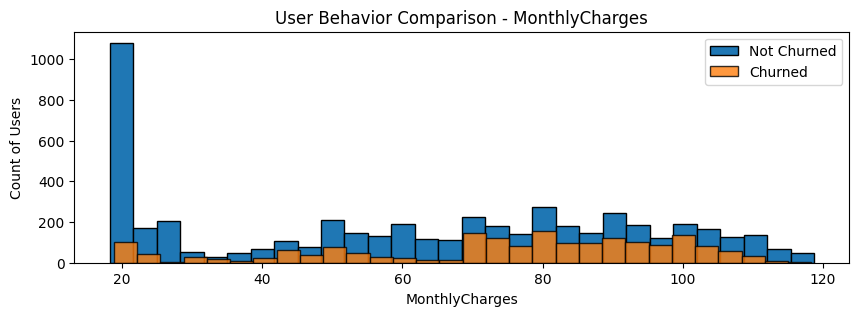

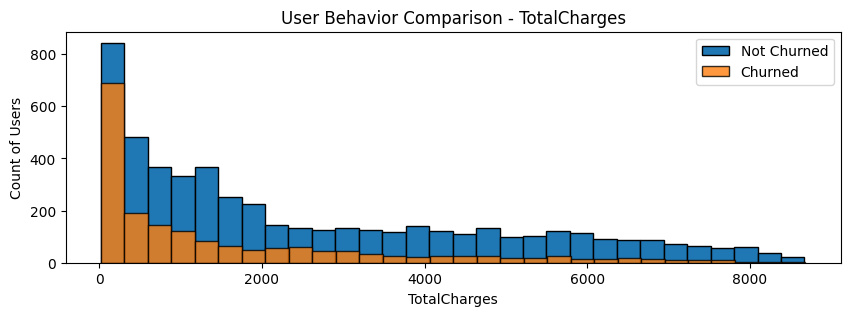

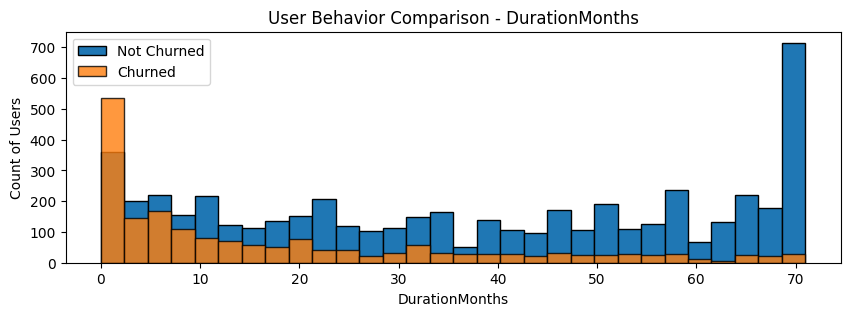

In [7]:
# Generate a histogram for each user group using the fields that are passed in to the function
def generate_histogram(df, attributes):
    for a in attributes:
    
        # Non-Churned users 
        df[df['Churned'] == 0][a].plot(kind='hist', bins=30, figsize=(10,3), edgecolor='black')

        # Churned users 
        df[df['Churned'] == 1][a].plot(kind='hist', bins=30, alpha=0.8, figsize=(10,3), edgecolor='black')

        # Set legend values
        plt.legend(['Not Churned', 'Churned'])

        # Set Axis and Title
        plt.xlabel(a)
        plt.ylabel('Count of Users')
        plt.title(f"User Behavior Comparison - {a}")

        # Plot Histogram
        plt.show()
        
# Create list of features with numerical datatypes
attributes = ['MonthlyCharges','TotalCharges', 'DurationMonths']

# Run function
generate_histogram(contract, attributes)

#### Findings

- Churned users appear to have higher monthly charges and shorter duration of services with Interconnect than those who did not churn.
- Total Charges isn't a very good variable to make observations with because it is a function of both of the other variables inspected here.

#### Comparison of Data for Churned vs. Non-Churned Users (Categorical Variables)

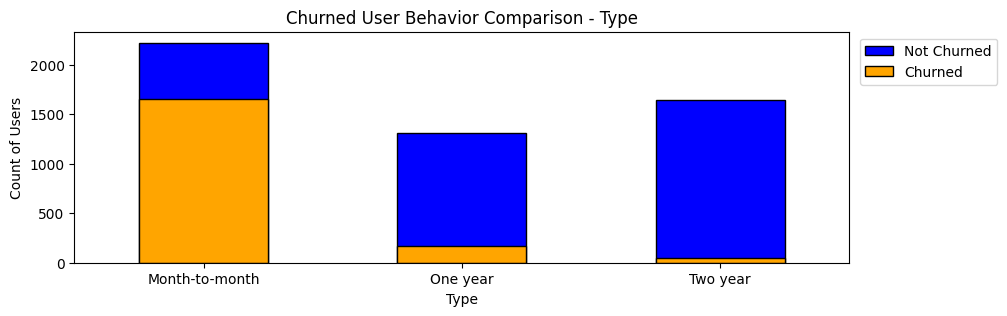

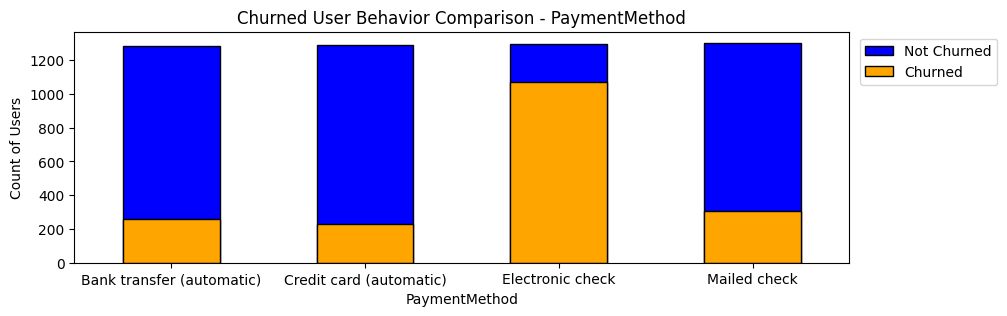

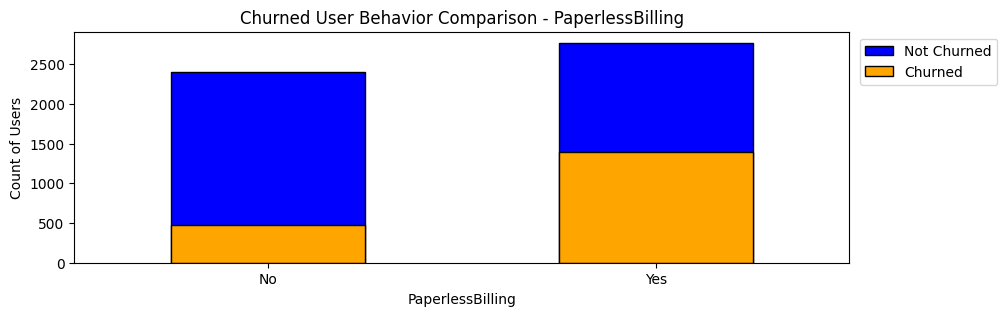

In [8]:
# Generate a histogram for each user group using the fields that are passed in to the function
def bar_plots(df, attributes):
    for a in attributes:
        
        # Pivot df into a format usable with bar plot
        table = pd.pivot_table(df, values='customerID', index=a,
                               columns='Churned', aggfunc="count")

        # Non-Churned users 
        no_churn = table[0].to_frame(name="vals").reset_index()
        
        # Churned users 
        churn = table[1].to_frame(name="vals").reset_index()

        # Plot Histogram on same plot
        ax = no_churn.plot(kind='bar', x = a, y = 'vals', color ='blue', figsize = (10, 3), stacked='False', rot=0, edgecolor='black')
        churn.plot(ax=ax,kind='bar', x = a, y = 'vals', color ='orange', figsize = (10, 3), stacked='False', rot=0, edgecolor='black')

        # Set legend values
        plt.legend(['Not Churned', 'Churned'], loc='upper right', bbox_to_anchor=(1.2, 1))

        # Set Axis and Title
        plt.xlabel(a)
        plt.ylabel('Count of Users')
        plt.title(f"Churned User Behavior Comparison - {a}")
 
# Create a list of features with categorical datatypes
attributes = ['Type','PaymentMethod','PaperlessBilling']

# Run function
bar_plots(contract, attributes)

#### Findings

- Churned users are more likely than non-churned users to:
    - Be in month-to-month contracts
    - Pay with electronic check
    - Use paperless billing
    
#### Summary and Conclusions (Contract Dataset)

- I created a field called `Churned` that has 0 for users that did not churn and 1 for users that churned
- I converted `BeginDate` and `EndDate` to datetime and `TotalCharges` to float
- I created a field called `DurationMonths` to be used as a feature in model training
    - This value was calculcated by subtracting end date from start date and converting to months. If the user did not churn, Feb 1, 2020 was used as the placeholder "churn" date (this is the date the data was validated).
- There are 1869 users in the dataset that have churned. This represents approximately 27% of the user base.
- Compared to users that have not churned, churned users have higher monthly charges and they are with Interconnect for a shorter period of time than non-churned users. Nothing can be inferred from total charges because it is a function of both monthly charges and monthly duration spent with Interconnect.
- Compared to users that have not churned, churned users are more likley to be in month-to-month contracts, they use electronic check as their payment method, and they use paperless billing.

### Personal Dataset

#### Overview

In [9]:
# Check descriptive_stats for Personal
descriptive_stats(personal)

First five rows of dataframe


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Random five rows of dataframe


,customerID,gender,SeniorCitizen,Partner,Dependents
6271,6726-WEXXK,Male,1,Yes,No
6640,3315-IKYZQ,Male,0,Yes,Yes
4351,6671-NGWON,Female,0,No,No
2724,4636-TVXVG,Male,0,Yes,Yes
5249,5115-GZDEL,Male,0,No,Yes



Check for Missing Values
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Check Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

Describe Dataframe
        customerID gender  SeniorCitizen Partner Dependents
count         7043   7043    7043.000000    7043       7043
unique        7043      2            NaN       2          2
top     7740-KKCXF   Male            NaN      No         No
freq             1   3555            NaN    3641       4933
mean           NaN    NaN       0.162147     NaN        NaN
std 

#### Summary and Conclusions (Personal Dataset)

- This is a demographics dataset which has personal information about each customer.
    - One of the features, `SeniorCitizen`, is already encoded, but the remainder are "yes"/"no" data and will need to be encoded later.
    - I will later join it with the Contract dataset.
- There are no duplicated rows.
- There are no missing values.
- All datatypes are appropriate.
- No additional features need to be created.
- I am capitalizing the `gender` column just for uniformity purposes.

In [10]:
# Capitalize name of gender column
personal.rename(columns={'gender': 'Gender'}, inplace=True)

### Internet Dataset

#### Overview

In [11]:
# Check descriptive_stats for Internet
descriptive_stats(internet)

First five rows of dataframe


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Random five rows of dataframe


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
593,4381-MHQDC,DSL,Yes,No,Yes,Yes,No,No
5433,2898-MRKPI,Fiber optic,No,Yes,No,No,Yes,Yes
3142,7754-IXRMC,DSL,No,No,No,No,No,No
4676,0687-ZVTHB,DSL,Yes,Yes,Yes,No,No,Yes



Check for Missing Values
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Check Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

Describe Dataframe
        customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
un

#### Summary and Conclusions (Internet Dataset)

- This is a description of which internet services each customer has
    - Internet service can be DSL or Fiber optic.
    - Participation in the other services is noted by "yes" or "no" which will have to be encoded in a later step.
    - This dataset will be joined to the Contract dataset in a later step.
- There are no duplicated rows.
- There are no missing values.
- No datatypes need to be converted.
- No additional features need to be added.
- There are 5517 rows vs. 7043 in the Contract and Personal datasets
    - Likely because not all users have an Internet plan.
    
### Phone Dataset

#### Overview

In [12]:
# Check descriptive_stats for Phone
descriptive_stats(phone)

First five rows of dataframe


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



Random five rows of dataframe


,customerID,MultipleLines
4039,4925-LMHOK,Yes
2305,9081-WWXKP,No
1278,5678-VFNEQ,Yes
2027,8495-LJDFO,Yes
650,4697-LUPSU,No



Check for Missing Values
customerID       0
MultipleLines    0
dtype: int64

Check Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

Describe Dataframe
        customerID MultipleLines
count         6361          6361
unique        6361             2
top     5228-EXCET            No
freq             1          3390

Count of Duplicated Rows
0


#### Summary and Conclusions (Phone Dataset)

- This is a description of each customer's phone service
    - Specifically, it gives a "yes" or "no" if they have multiple phone lines, which will need to be encoded later.
    - This will be joined to the Contract dataset in a later step.
- There are no duplicated rows.
- There are no missing rows.
- No datatypes need to be converted.
- No additional features need to be added.
- There are 6361 rows vs. 7043 in the Contract and Personal datasets
    - Likely because not all users have a Phone plan.
 
## Combining, Cleaning, and Exploring the New Dataset

### Merge Data

As mentioned in each of the dataset summaries, all 4 dataframes need to be merged:
- Only the Contract dataset has churn data, which is our target for analysis.
- Data from all 4 dataframes will be vital for understanding users' churn behavior
- All 4 datasets have a `customerID` column.

In [13]:
# Create merged dataframe "data" by joining contract to personal on customerID column
# These have the same number of rows
data = contract.merge(personal, how = 'inner', on = 'customerID')

# Join data to internet on customerID column
# Using how = 'left' because internet dataset has fewer rows than contract/personal
data = data.merge(internet, how = 'left', on = 'customerID')

# Join data to phone on customerID column
# Using how = 'left' because phone dataset has fewer rows than contract/personal
data = data.merge(phone, how = 'left', on = 'customerID')

# Check to ensure that no rows were lost in the joins
print('Contract Rows -', contract.shape[0])
print('Data Rows -', data.shape[0])

Contract Rows - 7043
Data Rows - 7043


In [14]:
# Check Resulting Dataframe
descriptive_stats(data)

First five rows of dataframe


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churned,EndDate_New,DurationMonths,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,2020-02-01,1,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0,2020-02-01,34,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1,2019-12-01,2,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2020-02-01,45,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1,2019-11-01,2,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No



Random five rows of dataframe


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churned,EndDate_New,DurationMonths,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
3289,9626-VFRGG,2016-09-01,No,Month-to-month,Yes,Bank transfer (automatic),88.50,3645.05,0,2020-02-01,41,Female,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
1503,0481-SUMCB,2016-05-01,No,One year,Yes,Bank transfer (automatic),102.15,4735.35,0,2020-02-01,45,Female,1,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
4987,5846-ABOBJ,2014-03-01,No,Two year,No,Bank transfer (automatic),24.45,1730.65,0,2020-02-01,71,Male,0,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3740,0508-OOLTO,2019-12-01,No,Month-to-month,Yes,Electronic check,71.65,135.75,0,2020-02-01,2,Female,0,Yes,Yes,Fiber optic,No,No,No,No,No,No,No
5335,3327-YBAKM,2014-10-01,No,One year,Yes,Mailed check,96.90,6314.35,0,2020-02-01,64,Female,0,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,No



Check for Missing Values
customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churned                0
EndDate_New            0
DurationMonths         0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

Check Data Types
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object

### Clean Data and Add Features

#### `HasPhone`

In [15]:
# If user has a null value for MultipleLines this means that the user doesn't have phone service
# Create new field called HasPhone - 0 if MultipleLines is null, else 1
data['HasPhone'] = data['MultipleLines'].notnull().astype(int)

#### `HasInternet`

In [16]:
# If user has a null value for InternetService this means that the user doesn't have internet service
# Create new field called HasInternet - 0 if InternetService is null, else 1
data['HasInternet'] = data['InternetService'].notnull().astype(int)

#### Service Start Date - Additional Date Variables
Create features that will tell the model when the user started their service with interconnect:
- `start_day`
- `start_month`
- `start_year`

In [17]:
# Service start day of week
data['start_day'] = data['BeginDate'].dt.dayofweek

# Service start month
data['start_month'] = data['BeginDate'].dt.month

# Service start year
data['start_year'] = data['BeginDate'].dt.year

#### Replacing Missing Values Due to Phone and Internet Left Joins
Not every user with a contract has both phone and internet. For example, when a user doesn't have internet, but has phone, the customer will have null values for internet related fields. For these null (missing values) we will need to replace them with a value. I will replace null values with the string 'N/A' because these fields are not applicable to the user if they do not have the service.

In [18]:
# Check which fields have missing values first
print('Check For Missing Values Before Fill')
print(data.isna().sum())
print()

# Replace missing values with 'N/A'
data = data.fillna('N/A')

# Check that missing values have been replaced
print('Check For Missing Values After Fill')
print(data.isna().sum())
print()

Check For Missing Values Before Fill
customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churned                0
EndDate_New            0
DurationMonths         0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
HasPhone               0
HasInternet            0
start_day              0
start_month            0
start_year             0
dtype: int64

Check For Missing Values After Fill
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churned             0
EndDate_New    

### Combined Dataframe Exploratory Data Analysis
Now that there are no longer and missing values and we've checked that we didn't lose any rows due to the joins of each dataframe, we can perform exploratory data analysis on the combined dataframe. I will use the same visualization function as I did earlier to plot numerical and categoraical fields to analyze the difference between users that churned versus users that did not churn.

In [19]:
# Check datatypes so I can add fields to list below
data.info()

# Create list of relevant numerical columns to be visualized
# Note: some of these are numerical only because they are already encoded, not because they are quantitative variables
# They are still technically categorical
# I am repeating some from the previous section, but also removing irrelevant values such as TotalCharges
numerical = ['MonthlyCharges',
             'DurationMonths',
             'SeniorCitizen',
             'HasPhone',
             'HasInternet']

# Create list of relevant categorical columns to be visualized
categorical = ['Type',
                'PaperlessBilling',
                'PaymentMethod',
                'Gender',
                'Partner',
                'Dependents',
                'OnlineSecurity',
                'OnlineBackup',
                'DeviceProtection',
                'TechSupport',
                'StreamingTV',
                'StreamingMovies',
                'MultipleLines',
                'InternetService']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churned           7043 non-null   int64         
 9   EndDate_New       7043 non-null   datetime64[ns]
 10  DurationMonths    7043 non-null   int64         
 11  Gender            7043 non-null   object        
 12  SeniorCitizen     7043 non-null   int64         
 13  Partner           7043 non-null   object        
 14  Dependents        7043 n

#### Comparison of Data for Churned vs. Non-Churned Users (Numerical Variables)

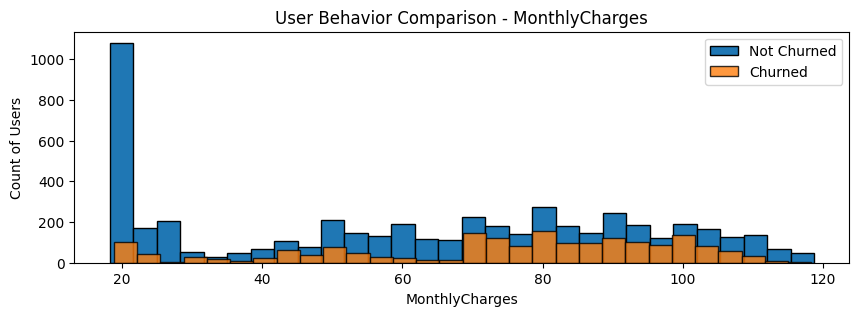

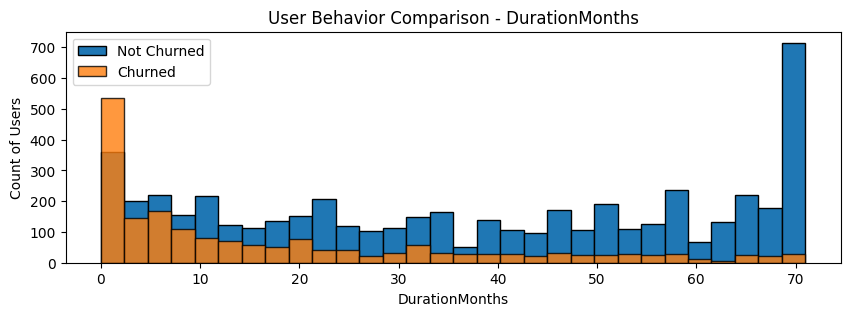

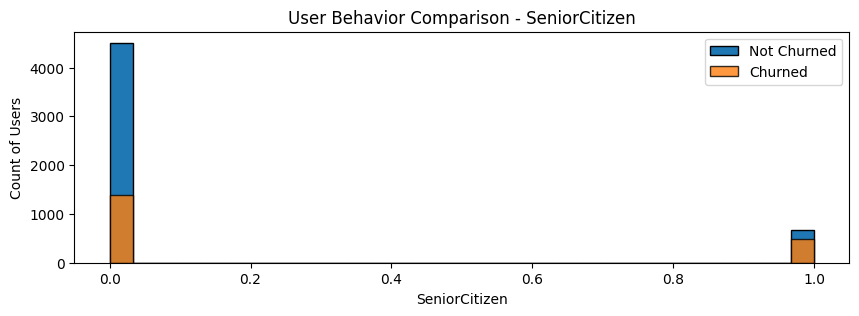

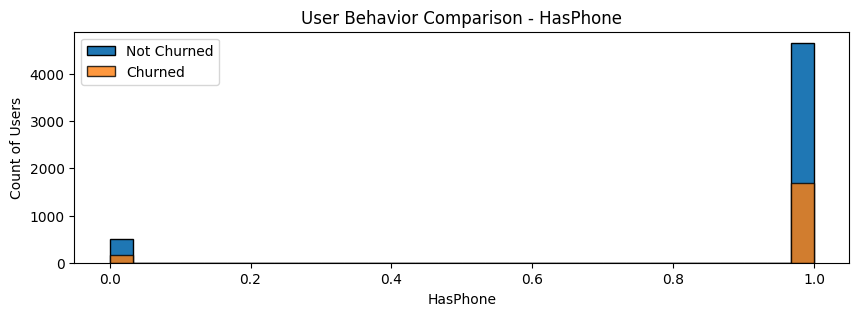

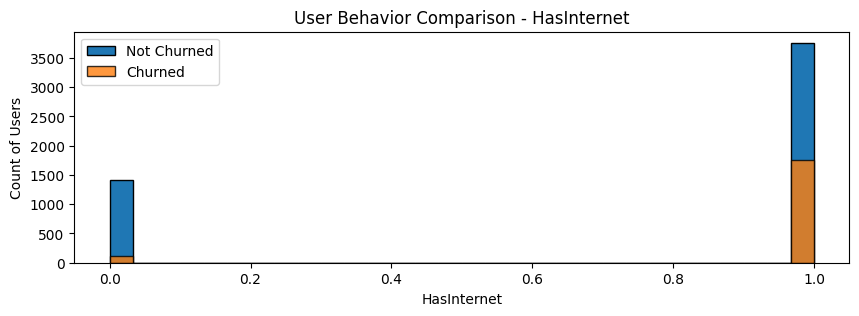

In [20]:
# Plot numerical fields
generate_histogram(data, numerical)

#### Comparison of Data for Churned vs. Non-Churned Users (Categorical Variables)

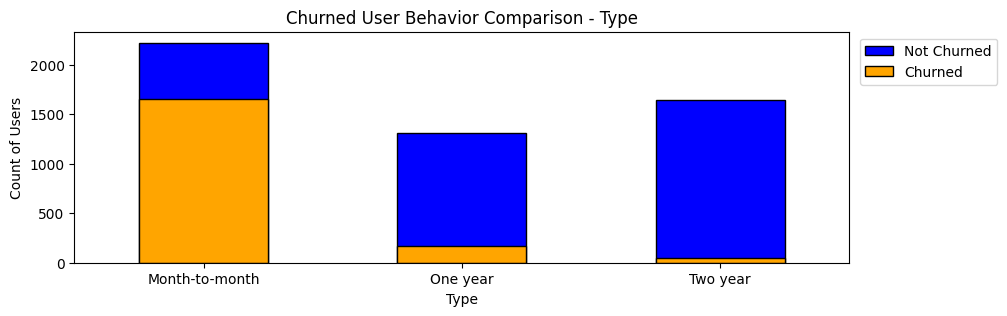

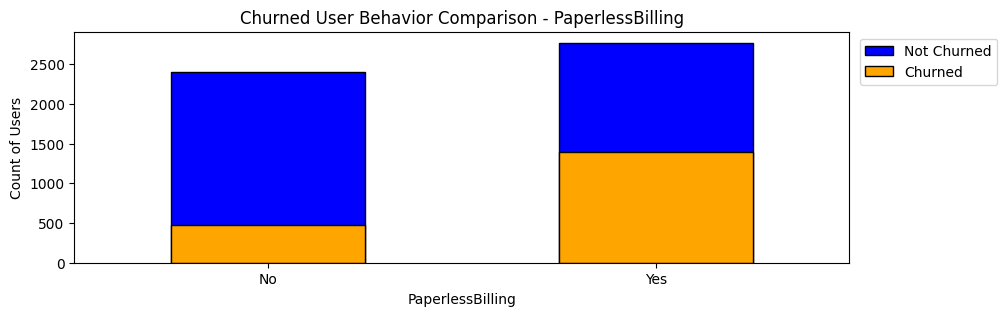

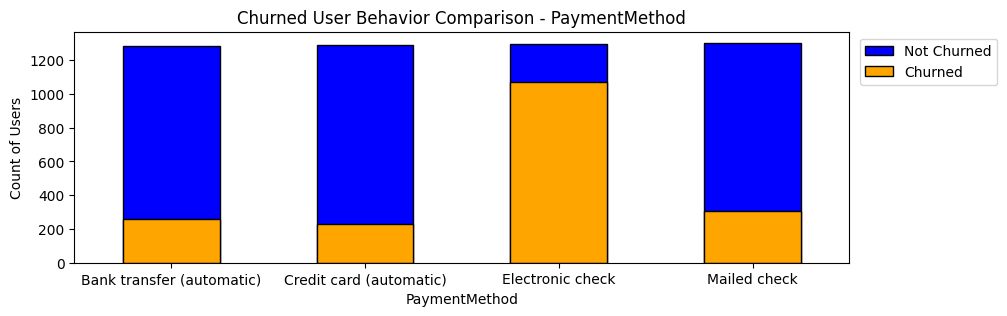

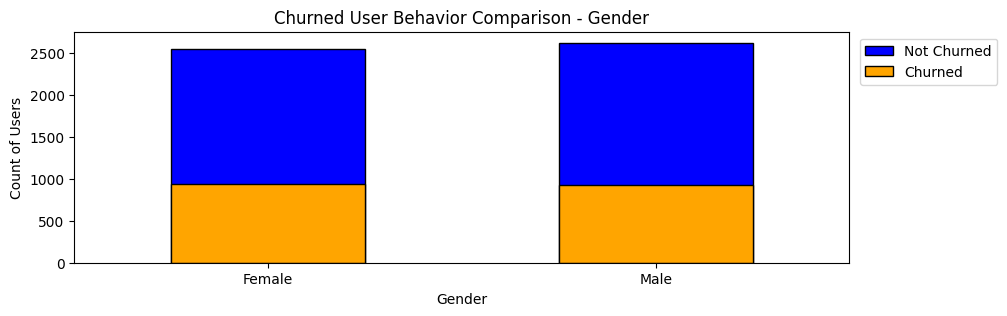

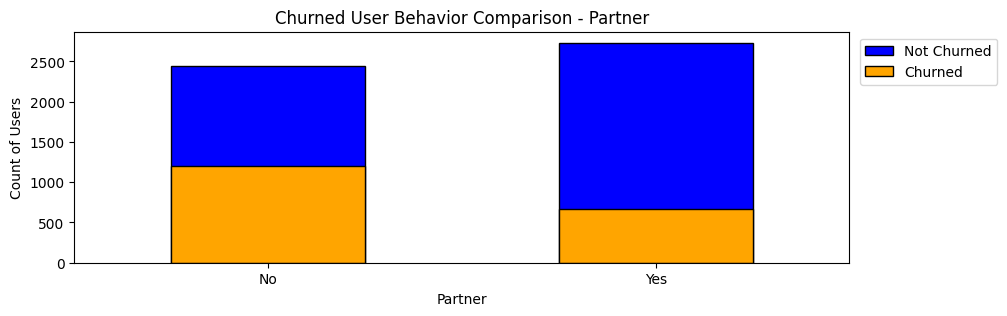

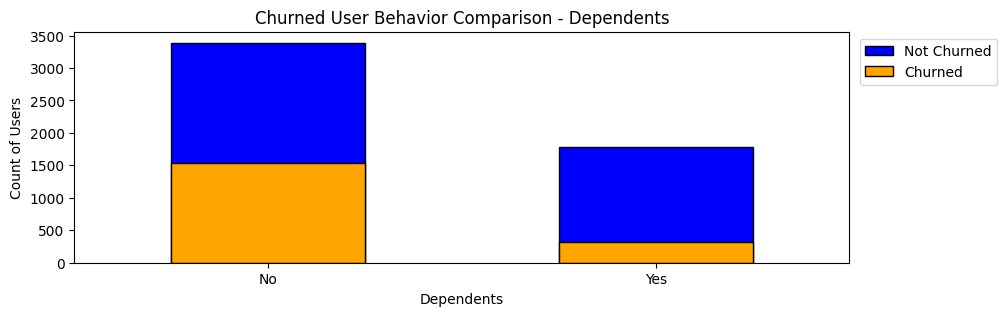

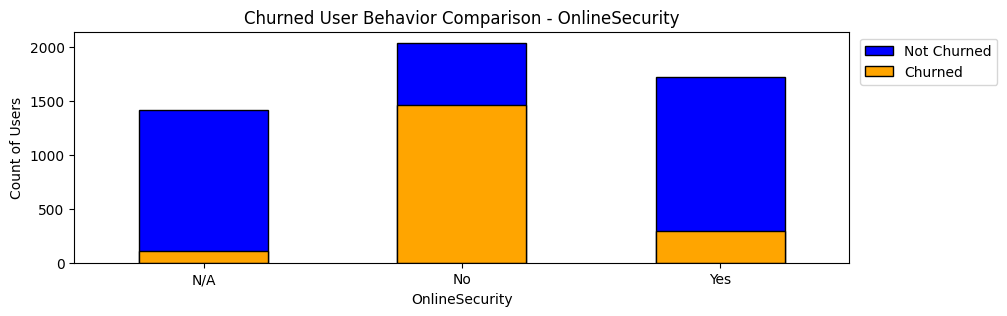

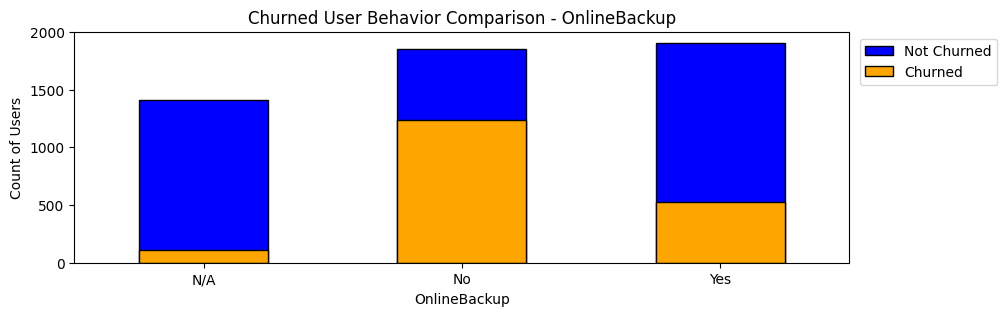

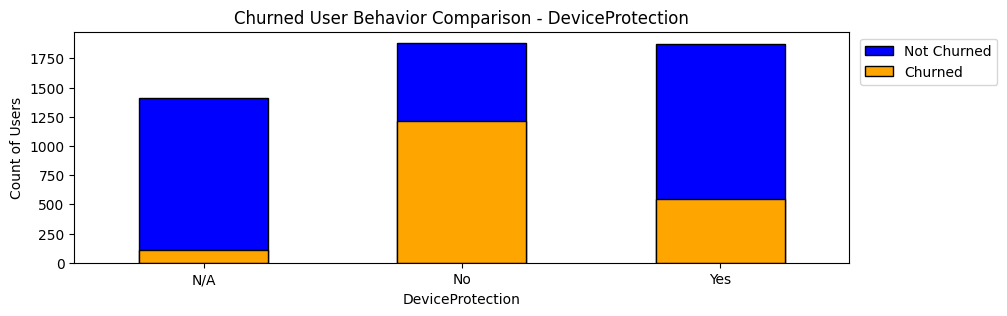

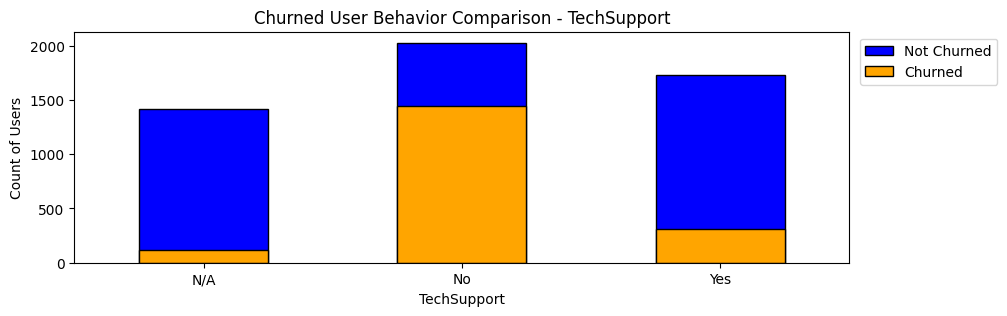

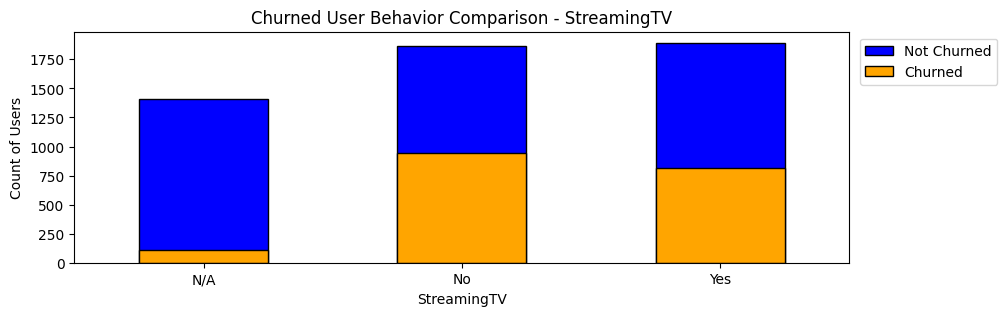

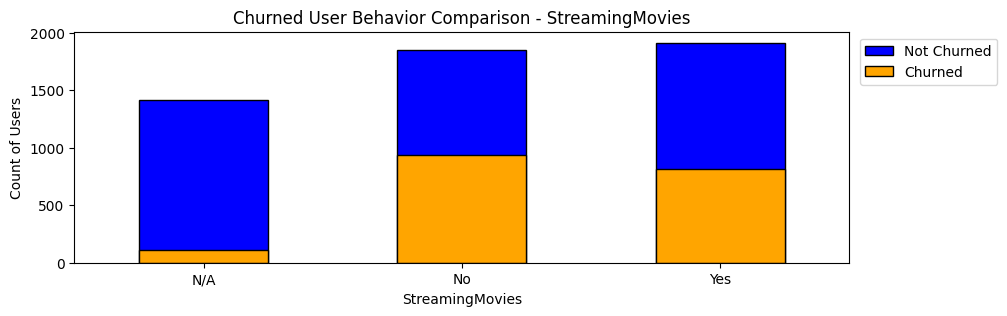

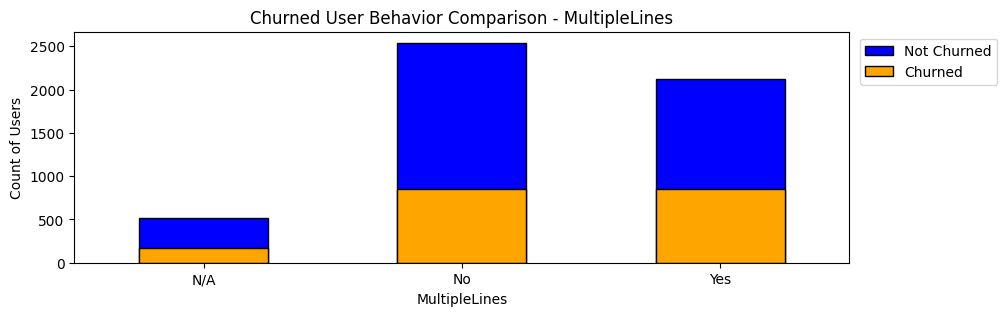

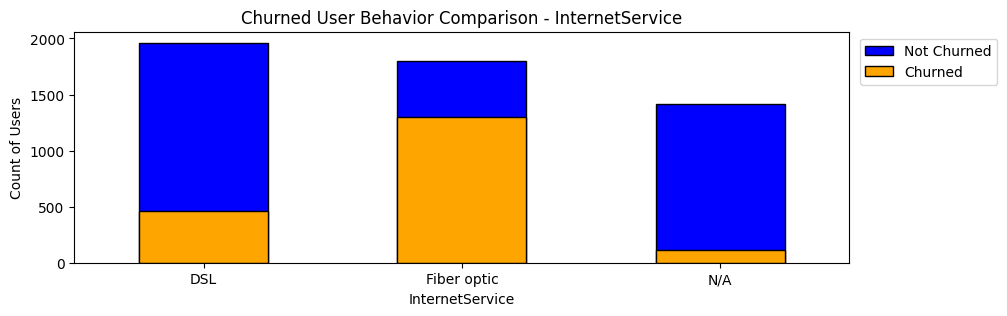

In [21]:
# Plot categorical fields
bar_plots(data, categorical)

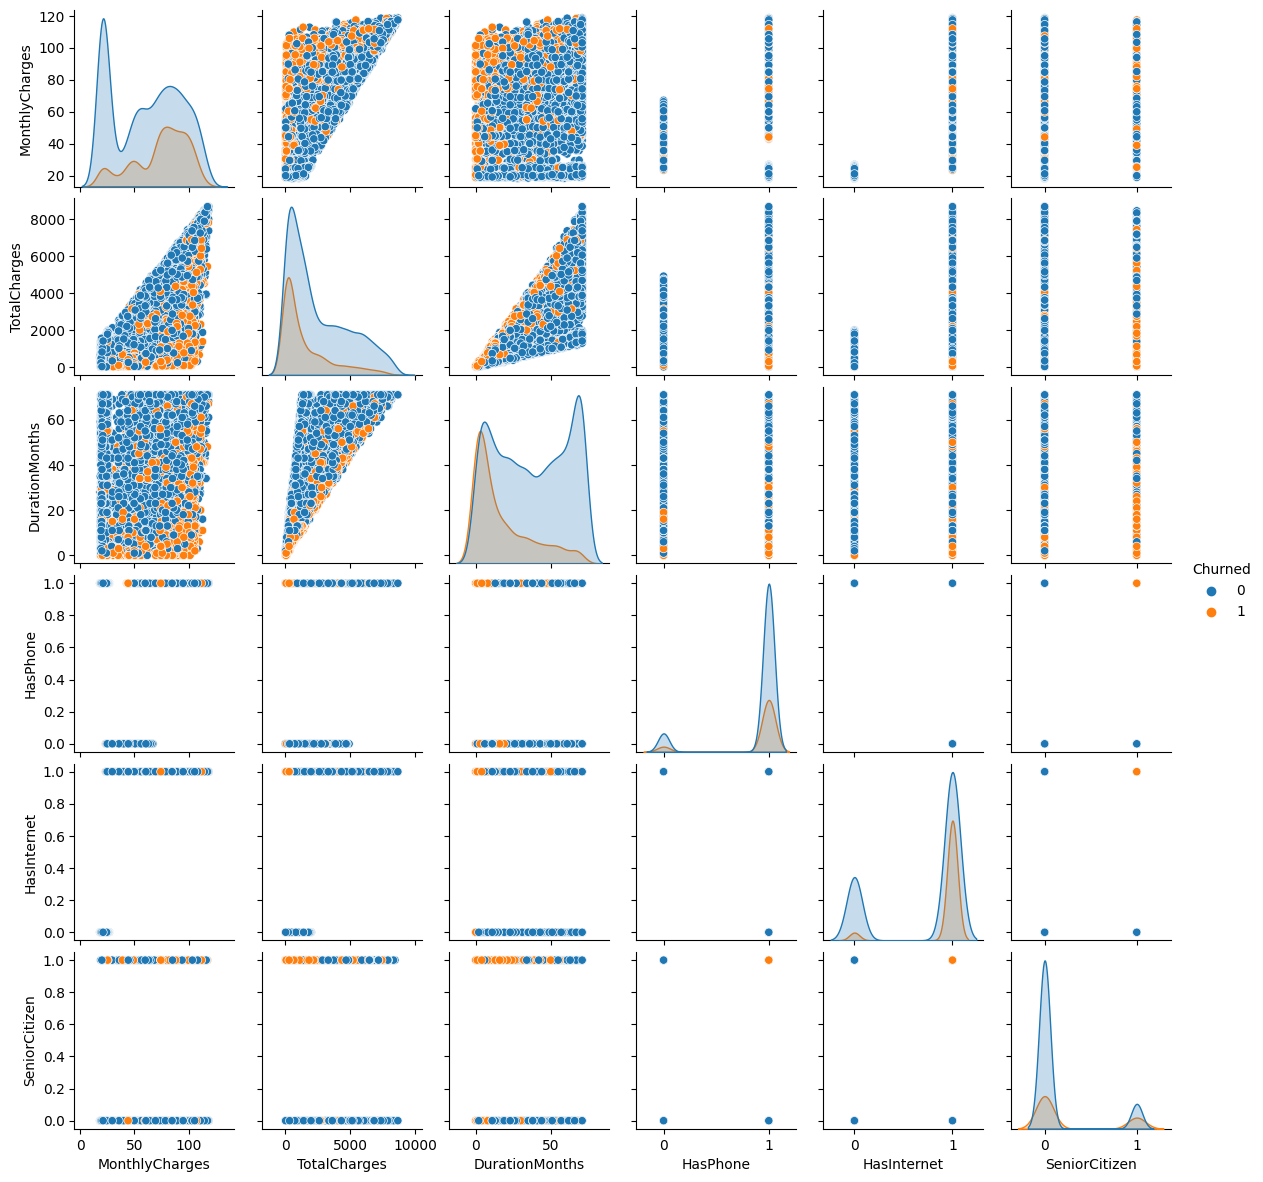

In [22]:
# Adding a pair plot for another visualization of select features
cols_to_plot = [
    'MonthlyCharges',
    'TotalCharges',
    'DurationMonths',
    'HasPhone',
    'HasInternet',
    'SeniorCitizen',
    'Churned'  # for hue
]

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[cols_to_plot], hue='Churned', height=2)
plt.show()

### Summary and Conclusions for Combined Dataset

Factors that appear to be correlated with users who churned:
- Service duration under 1 year
- Higher monthly charges than users who didn't churn
- Paying month-to-month
- Pay with electronic check
- Not having a partner
- Not being a senior citizen
- Not having dependents
- Has phone service
- Has internet
    - Specifically fiber optic service
    - Having other internet services, specifically Online Security, Online Backup, Device Protection, and Tech Support
    
Modeling will assist in painting a clearer picture of which customers are most likely to churn, but this data analysis provides a pretty clear picture so far. Interconnect can use these insights, plus modeling results, to attempt to prevent churn or entice customers back more easily after they churn.

## Clarifying Questions and Work Plan for Section 2

We will pause the analysis for now and use the insights gathered so far to prepare for the second part of the project - modeling. Using this information, we have prepared a list of clarifying questions to submit to Interconnect to ensure that the modeling is done properly and in line with their business need. In addition, a work plan outline for Section 2 has been provided.

### Clarifying Questions

- **Project:**
    - Is Interconnect more interested in *why* customers churn (explainability), or just predicting churn accurately based on *who* is churning (performance)?
        - The answer to this question is largely based on what the goal of the prediction model is:
            - Changing business practices to retain customers in the first place
            - Reaching out to customers to attempt to prevent churn
            - Reaching out to customers to get them back after churn
    - Are there any business rules (or other important details) that influence what counts as "churn" (e.g., time delay, grace period)?
    

- **Data:**
    - Could you please provide a document outlining the different ways customers can sign up, pay, purchase individual/bundled services, etc.?
        - We have been told that clients can choose either a monthly payment or sign a 1- or 2-year contract, and they can use various payment methods and receive an electronic invoice after a transaction, but we would like to make sure everything is complete on our end.
    - Should `TotalCharges` include missing values where customers just started? Should we impute or drop?
    - Is `MonthlyCharges` capped, or could it scale higher for premium services, if offered?
    - Do all categorical features (e.g., `PaymentMethod`, `InternetService`) need to be encoded, or can some be grouped/simplified?
    - Is there class imbalance in `Churned`, and how should we handle it (e.g., up/downsampling)?
        - Is this dataset representative of the whole population of customers at the time, or just a sample?
    - Are there any features that will not be available at future prediction time (i.e., using a contemporaneous dataset)?
    - Is there any other data, or comments about the data provided, that should be taken into account?
        - For example, any fields to add or exclude, or provide additional weight to based on previous studies.
        

- **Modeling:**
    - Is there a preference for the ratio of Training-Validation-Test data to be used for modeling?
        - If not, 3-1-1 will be used.
    - Interconnect has requested that we use the AUC-ROC metric for model evaluation.
        - The acceptance criteria is that the model must have an AUC-ROC over 0.75, but over 0.88 is preferred.
        - Are there any additional criteria or metrics that Interconnect would prefer the chosen model to exhibit?
            - If not, AUC-ROC and Accuracy will be evaluated.
    - How important is model training, testing, and/or prediction speed for the overall selection of the most appropriate model?
        - Are there any preferences or hard upper limits to be imposed on these speeds?
    - How many models would Interconnect like to be presented with as finalists?
        - Generally this would be narrowed down to 1, but it depends on business need and preferences.

### Work Plan

Now that the data is mostly processed and exploratory data analysis has been performed, here are the next steps to complete the project:
1. Drop features that aren't helpful for modeling.
2. Encode any remaining categorical fields (some were already encoded in the original data) to allow models to use them.
3. Scale numerical features to prevent undue weight from being placed on larger values.
4. Split dataset into Training, Validation, and Test Sets (3:1:1 ratio).
5. Create simple baseline models for later comparison to other, more tailored, models:
    - DummyClassifier (stratified)
    - LogisticRegression
6. Train and tune several additional models (below) using:
    - A range of hyperparameters contained within GridSearchCV
    - With and without addressing class imbalance of `Churned`
    - Models:
        - RandomForestClassifier
        - LGBMClassifier
        - CatBoostClassifier
        - XGBClassifier
7. Compare all 6 models above by evaluating:
    - AUC-ROC when predicting Validation and Test Sets
    - Accuracy when predicting Validation and Test Sets
    - Speed of Training, Validation, and Prediction operations
8. Select the best model for use by Interconnect to predict customer churn using current or future data.

<div class="alert alert-block alert-success">
Answers to clarifying questions:<br>
    Project<br>
    1. Interconnect is just interested in predicting who will churn. <br>
    2. No extra rules to apply, just wanting to predict if the customer churns. <br>
    Data<br>
    3.There is no such document for this, and we don't need to worry about how a customer signs up. <br>
    4. You choose how to deal with missing values in the way you see fit. <br>
    5. Monthly Charges is not capped! <br>
    6. Yes all category vars should be encoded as numbers to be used in machine learning models.<br>
    7. It is up to you to decide how to deal with class imbalence. <br>
    8. All of the features given in the dataset should be available for future prediction.<br>
    9. Nothing in particular to add, you can make your own assessment about what might be beneficial to prediction of churn.<br>
    Modeling <br>
    10. 3-1-1 works just fine!<br>
    11. No additional metrics are required to be cared about.<br> 
    12. Prediciton speed actually does not matter. <br>
    13. In the end we only really care about the best performing model. It is ok to make note of other models but you really only care about the top model. 
<a class="tocSkip"></a>

# <u>**Section 2: Model Training and Evalulation**</u>

## Data Preparation for Modeling

As outlined in the Work Plan, this section will include the following steps:
1. Drop features that aren't helpful for modeling.
2. Encode any remaining categorical fields (some were already encoded in the original data) to allow models to use them.
3. Scale numerical features to prevent undue weight from being placed on larger values.
4. Split dataset into Training, Validation, and Test Sets (3:1:1 ratio).

### Drop Features Not Useful for Modeling

Not all features in the dataset will be useful for modeling. Some are irrelevant or add noise that would reduce the accuracy of predictions. The following fields will be removed:
- `customerID`
- `BeginDate`
- `EndDate`
- `EndDate_New`
- `DurationMonths` - dropping to prevent data leakage - this variable is closely correlated with the target, `Churned`

In [23]:
# Create list of fields to drop
# Drop months_diff to avoid data leakage
fields_to_drop = ['customerID','BeginDate','EndDate','EndDate_New','DurationMonths']

# Create list of fields to drop
data = data.drop(columns=fields_to_drop)

# Check that fields were dropped
data.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churned,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,HasPhone,HasInternet,start_day,start_month,start_year
0,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,N/A,0,1,2,1,2020
1,One year,No,Mailed check,56.95,1889.50,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1,1,5,4,2017
2,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,1,1,1,10,2019
3,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,N/A,0,1,6,5,2016
4,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,1,1,6,9,2019


### Encode Categorical Features

Some of the categorical features were already encoded (0 or 1 instead of Yes and No) but others still need to be. Since none of the remaining categorical features have a ranking or order, I will use One-Hot Encoding for the majority of the variables. For cyclical/time variables, `start_month` and `start_day` I will use cyclical encoding. 

In [24]:
# Create a list of the columns that need to be converted
categorical_columns = ['Type','PaperlessBilling','PaymentMethod','Gender','Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']

# Convert categorical fields to numerical fields using OHE
# Not removing dummy variables because the categorical fields are not binary (1/0)
data_ohe = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

In [25]:
# Cyclical encoding of start_month and start_day
data_ohe['start_month_sin'] = np.sin(2 * np.pi * data_ohe['start_month'] / 12)
data_ohe['start_month_cos'] = np.cos(2 * np.pi * data_ohe['start_month'] / 12)

data_ohe['start_day_sin'] = np.sin(2 * np.pi * data_ohe['start_day'] / 31)
data_ohe['start_day_cos'] = np.cos(2 * np.pi * data_ohe['start_day'] / 31)

# Dropping original fields to prevent redundancy
cyclical_fields_to_drop = ['start_month', 'start_day']
data_encoded = data_ohe.drop(columns=cyclical_fields_to_drop)

# Print sample of fully encoded data frame
data_encoded.head()

,MonthlyCharges,TotalCharges,Churned,SeniorCitizen,HasPhone,HasInternet,start_year,Type_Month-to-month,Type_One year,Type_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_N/A,OnlineSecurity_N/A,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_N/A,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_N/A,DeviceProtection_No,DeviceProtection_Yes,TechSupport_N/A,TechSupport_No,TechSupport_Yes,StreamingTV_N/A,StreamingTV_No,StreamingTV_Yes,StreamingMovies_N/A,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_N/A,MultipleLines_No,MultipleLines_Yes,start_month_sin,start_month_cos,start_day_sin,start_day_cos
0,29.85,29.85,0,0,0,1,2020,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0.500000,8.660254e-01,0.394356,0.918958
1,56.95,1889.50,0,0,1,1,2017,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0.866025,-5.000000e-01,0.848644,0.528964
2,53.85,108.15,1,0,1,1,2019,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,-0.866025,5.000000e-01,0.201299,0.979530
3,42.30,1840.75,0,0,0,1,2016,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0.500000,-8.660254e-01,0.937752,0.347305
4,70.70,151.65,1,0,1,1,2019,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,-1.000000,-1.836970e-16,0.937752,0.347305


### Split Data into Training, Validation, and Test Sets

I will split the data into the three sets with the ratio 3:1:1.

In [26]:
# The validiation set will be split in half to get 3 datasets with a ratio of 3:1:1
# Set Random State to 12345 to replicate set splits in Future
state = 12345
# 60% of data will be in training_set and other 40% will be in validation_set_to_split
training_set, validation_set_to_split = train_test_split(data_encoded, test_size=0.40, random_state=state)

# Split validation_set_to_split in half to create a validation and test set
validation_set, test_set = train_test_split(validation_set_to_split, test_size=0.50, random_state=state)

# Create the features and target training datasets
features_train = training_set.drop(['Churned'], axis=1)
target_train = training_set['Churned']

# Create the features and target validation datasets
features_valid = validation_set.drop(['Churned'], axis=1)
target_valid = validation_set['Churned']

# Create the features and target test datasets
features_test = test_set.drop(['Churned'], axis=1)
target_test = test_set['Churned']

#Training 
print(features_train.shape) # Training set contains 60% of original dataframe rows 
print(target_train.shape)   # Training set contains 60% of original dataframe rows 

# Validation
print(features_valid.shape) # Validation set contains 25% of original dataframe rows 
print(target_valid.shape)   # Validation set contains 25% of original dataframe rows 

# Test
print(features_test.shape)  # Test set contains 25% of original dataframe rows 
print(target_test.shape)    # Test set contains 25% of original dataframe rows 

(4225, 49)
(4225,)
(1409, 49)
(1409,)
(1409, 49)
(1409,)


## Model Training and Tuning

As outlined in the Work Plan, this section will include the following steps:

5. Create simple baseline models for later comparison to other, more tailored, models:
    - DummyClassifier (stratified)
    - LogisticRegression
6. Train and tune several additional models (below) using:
    - A range of hyperparameters contained within GridSearchCV
    - Without addressing class imbalance of `Churned`
        - I believe the models should also be evaluated after addressing class imbalance - I will revisit this towards the end in a streamlined re-tuning and prediction of the Test Set with the 2 best models
    - Models:
        - RandomForestClassifier
        - LGBMClassifier
        - CatBoostClassifier
        - XGBClassifier

## Model Evaluation and Comparison

As outlined in the Work Plan, this section will include the following steps:

7. Compare all 6 models above by evaluating:
    - AUC-ROC when predicting Validation and Test Sets
    - Accuracy when predicting Validation and Test Sets
    - Speed of Tuning, Training, and Prediction (on Validation and Test Sets) operations
8. Select the best model for use by Interconnect to predict customer churn using current or future data.

### DummyClassifier (Baseline)

In [27]:
%%time

# Create a baseline random classifier
model = DummyClassifier(strategy='stratified', random_state=state)

# Start training timer
start = time.time()

# Fit the classifier on the training data
model.fit(features_train, target_train)

end = time.time()
train = (end - start) * 1000

# Start prediction timer
start = time.time()

# Make predictions on the validation features
prediction_valid = model.predict(features_valid)

end = time.time()
predict = (end - start) * 1000

# Calculate accuracy and other metrics
accuracy = accuracy_score(target_valid, prediction_valid)
report = classification_report(target_valid, prediction_valid)

# Calculate and print AUC_ROC Score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC score on Validation Set:", round(auc_roc,3))
print()

# Print the results
print("Accuracy on Validation Set:", round(accuracy,3))
print()

print("Classification Report:")
print(report)
print()

print(f"Training took {train:.3f} ms.")
print()
      
print(f"Prediction took {predict:.3f} ms.")
print()

print("Code block execution times:")

AUC-ROC score on Validation Set: 0.504

Accuracy on Validation Set: 0.612

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1027
           1       0.28      0.27      0.27       382

    accuracy                           0.61      1409
   macro avg       0.50      0.50      0.50      1409
weighted avg       0.61      0.61      0.61      1409


Training took 0.810 ms.

Prediction took 1.383 ms.

Code block execution times:
CPU times: user 10.8 ms, sys: 207 µs, total: 11.1 ms
Wall time: 9.95 ms


### Logistic Regression (Baseline)

In [28]:
%%time

# Create a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=state)

# Start training timer
start = time.time()

# Fit the classifier on the training data
model.fit(features_train, target_train)

end = time.time()
train = (end - start) * 1000

# Start prediction timer
start = time.time()

# Make predictions on the validation features
prediction_valid = model.predict(features_valid)

end = time.time()
predict = (end - start) * 1000

# Calculate accuracy and other metrics
accuracy = accuracy_score(target_valid, prediction_valid)
report = classification_report(target_valid, prediction_valid)

# Calculate and print AUC_ROC Score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("The AUC-ROC Score is on Validation Set:", round(auc_roc,3))
print()

# Print the results
print("Accuracy on Validation Set:", round(accuracy,3))
print()

print("Classification Report:")
print(report)
print()

print(f"Training took {train:.3f} ms.")
print()
      
print(f"Prediction took {predict:.3f} ms.")
print()

print("Code block execution times:")

The AUC-ROC Score is on Validation Set: 0.846

Accuracy on Validation Set: 0.806

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1027
           1       0.68      0.55      0.61       382

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Training took 48.148 ms.

Prediction took 7.980 ms.

Code block execution times:
CPU times: user 48.3 ms, sys: 43.8 ms, total: 92.1 ms
Wall time: 69.4 ms


For the next 4 models, I have created a function to perform the following:
- Print best hyperparameters that generated the best AUC_ROC on training set
- Print AUC-ROC on Validation dataset using hyperparamters found in tuning
- Print Accuracy on Validation dateset using hyperparamters found in tuning
- Print training, prediction, and whole code block operation times

In [29]:
# Create model evaluation function 
# For model tuning, we will use GridSearchCV and keep the search space constant across models
def model_evaluation(model,model_name):
    
    # Create a search space to optimize for best combination of n_estimators and max_depth
    search_space = {'n_estimators': [5,10,25,50]
                    , 'max_depth': [5,10,25,50]}
       
    # Initialize Model
    model = model
    
    # Create list of scoring/evaluation metrics
    scoring = ['accuracy','roc_auc']
    
    # Create a GridSearchCV Object
    # Use 3-fold cross validation (5 is the default, but to save time on training, we will use 3-fold)
    # Select Best Model Using roc_auc as Scorer function 
    model_grid = GridSearchCV(model, param_grid = search_space, cv = 5, scoring = 'roc_auc', refit = 'roc_auc', verbose = 0)

    # Start tuning timer
    start = time.time()
    
    # Select best fit model to training data
    model_grid.fit(features_train, target_train)
    
    # End tuning timer and calculate duration in ms
    end = time.time()
    tune = (end - start) * 1000
    
    # Best grid will contain the parameters that can be used to predict values on the validation set
    # The refitted estimator is made available at the best_estimator_ attribute and permits using predict directly on this GridSearchCV instance
    best_grid = model_grid.best_estimator_
    
    # Start best model training timer (excluding tuning)
    start = time.time()

    best_grid.fit(features_train, target_train)
    
    # End training timer and calculate duration in ms
    end = time.time()
    train = (end - start) * 1000
    
    # Save best parameters to variable that produce the smallest AUC_ROC
    # best_parameters will contain a dictionary of the best parameters that produced the lowest AUC_ROC
    best_parameters = model_grid.best_params_

    # Best score is the AUC_ROC value on the training data
    best_score = model_grid.best_score_

    # Start prediction timer
    start = time.time()
    
    # Predict target values on the validation set
    predicted_values = best_grid.predict(features_valid)
    
    # End prediction timer and calculate duration in ms
    end = time.time()
    predict = (end - start) * 1000
        
    # Calculate AUC-ROC score
    probabilities_valid = best_grid.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
    # Calculate accuracy between predicted target and actual target for validation set
    accuracy = accuracy_score(target_valid, predicted_values)

    # Print results of tuning and AUC_ROC & Accuracy on validation set 
    print("Best hyperparameters for", model_name,":", best_parameters )
    # Note - AUC_ROC score on Training data is not a very useful indicator of model quality, but I am including it as a sanity check
    print("These hyperparameters produced a best AUC-ROC score of", round(best_score,3), "on the Training Data")
    print()
    print("The AUC-ROC using the tuned", model_name, "on the Validation Set:", round(auc_roc,3))
    print("The Accuracy using the tuned", model_name, "on the Validation Set:",round(accuracy,3))
    print()
    print(f"Tuning took {tune:.3f} ms.")
    print()
    print(f"Training took {train:.3f} ms.")
    print()
    print(f"Prediction took {predict:.3f} ms.")
    print()
    print("Code block execution times:")

### Random Forest Classifier

In [30]:
%%time

# Set variables to RandomForestClassifier
model = RandomForestClassifier(random_state=state)
model_name = 'RandomForestClassifier'

# Configure model_evaluation to use RandomForestClassifier
model_evaluation(model, model_name)

The AUC-ROC Score is 0.879
Best hyperparameters for RandomForestClassifier : {'max_depth': 10, 'n_estimators': 50}
These hyperparameters produced a best AUC-ROC score of 0.869 on the Training Data

The AUC-ROC using the tuned RandomForestClassifier on the Validation Set: 0.879
The Accuracy using the tuned RandomForestClassifier on the Validation Set: 0.83

Tuning took 5572.146 ms.

Training took 152.851 ms.

Prediction took 10.718 ms.

Code block execution times:
CPU times: user 5.7 s, sys: 6.86 ms, total: 5.71 s
Wall time: 5.75 s


### LightGBM Classifier

In [31]:
%%time

# Set variables to LGBMClassifier
model = LGBMClassifier(random_state=state)
model_name = 'LGBMClassifier'

# Configure model_evaluation to use LGBMRegressor
model_evaluation(model, model_name)

The AUC-ROC Score is 0.903
Best hyperparameters for LGBMClassifier : {'max_depth': 10, 'n_estimators': 50}
These hyperparameters produced a best AUC-ROC score of 0.895 on the Training Data

The AUC-ROC using the tuned LGBMClassifier on the Validation Set: 0.903
The Accuracy using the tuned LGBMClassifier on the Validation Set: 0.865

Tuning took 10141.876 ms.

Training took 196.027 ms.

Prediction took 3.141 ms.

Code block execution times:
CPU times: user 10.2 s, sys: 159 ms, total: 10.4 s
Wall time: 10.3 s


### CatBoost Classifier

In [32]:
%%time

# Set variables to CatBoostClassifier
model = CatBoostClassifier(random_state=state, verbose=0)
model_name = 'CatBoostClassifier'

# Configure model_evaluation to use CatBoostClassifier
model_evaluation(model, model_name)

The AUC-ROC Score is 0.872
Best hyperparameters for CatBoostClassifier : {'max_depth': 5, 'n_estimators': 5}
These hyperparameters produced a best AUC-ROC score of 0.861 on the Training Data

The AUC-ROC using the tuned CatBoostClassifier on the Validation Set: 0.872
The Accuracy using the tuned CatBoostClassifier on the Validation Set: 0.821

Tuning took 17219.493 ms.

Training took 90.672 ms.

Prediction took 3.869 ms.

Code block execution times:
CPU times: user 13.3 s, sys: 82.7 ms, total: 13.4 s
Wall time: 17.3 s


### XGBoost Classifier

In [33]:
%%time

# Set variables to XGBClassifier
model = XGBClassifier(random_state=state, verbosity=0)
model_name = 'XGBClassifier'

# Configure model_evaluation to use XGBClassifier
model_evaluation(model, model_name)

The AUC-ROC Score is 0.909
Best hyperparameters for XGBClassifier : {'max_depth': 5, 'n_estimators': 50}
These hyperparameters produced a best AUC-ROC score of 0.9 on the Training Data

The AUC-ROC using the tuned XGBClassifier on the Validation Set: 0.909
The Accuracy using the tuned XGBClassifier on the Validation Set: 0.861

Tuning took 57006.000 ms.

Training took 897.026 ms.

Prediction took 4.385 ms.

Code block execution times:
CPU times: user 57.7 s, sys: 158 ms, total: 57.9 s
Wall time: 58 s


### Summary of Model Training - Tuning, Training, and Validation

|   Model   |   AUC-ROC Score (Validation)   |   Accuracy (Validation)   |  Tuning Time (ms) | Training Time (ms)  |   Prediction Time (Validation) (ms)  |     Best Hyperparameters    |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|   DummyRegressor  |   0.504  |   0.612  | N/A  | 0.516  |   1.015 |  N/A  |
|   LogisticRegression  |   0.846  |   0.806  | N/A  | 23.854  |  5.902  |  N/A  |
|  RandomForestClassifier  |  0.879  |  0.830  | 5495.998 | 157.014  |  10.718  |  `max_depth=10`, `n_estimators=50`  |   
|  LGBMClassifier  |  **0.903**  |  0.865  | 10141.876 | 196.027  |  3.141  |  `max_depth=10`, `n_estimators=50`  |   
|  CatBoostClassifier  |  0.872  |  0.821  | 17219.493 | 90.672  |  3.869  |  `max_depth=5`, `n_estimators=5`  |   
|  XGBClassifier  |  <u>**0.909**</u>  |  0.861  | 57006.000 | 897.026  |  4.385  |  `max_depth=5`, `n_estimators=50`  | 

<center><i>Note: AUC-ROC scores over 0.88 (preferred threshold) are <b>bolded</b>. Highest AUC-ROC score is <u>underlined</u></i>.</center>

After tuning, training, and prediction on the Validation set, it appears as though the best two models will be **LGBMClassifier** and **XGBClassifier** with AUC-ROC scores of 0.903 and 0.909, respectively. In the next section, we will make predictions about the Test Dataset and confirm these as the best models.

## Using Tuned Models to Predict Test Set

Now that we have tuned, trained, and predicted the validation set on 6 models, we will see how they predict the Test Dataset and make a more complete comparison of their performance. Normally, I would select the best-performing model(s) to move forward to the next section, but instead I have chosen to test all of them to double check that I am selecting the best one.

*This section will be performed without accounting for class imbalance, which will be done in the following section.*

### Dummy Classifier (Baseline)

In [34]:
%%time

# Create a baseline random classifier
model = DummyClassifier(strategy='stratified', random_state=state)

# Fit the classifier on the training data
model.fit(features_train, target_train)

# Start prediction timer
start = time.time()

# Make predictions on the validation features
prediction_test = model.predict(features_test)

# End prediction timer and calculate duration in ms
end = time.time()
predict = (end - start) * 1000

# Calculate accuracy and other metrics
accuracy = accuracy_score(target_test, prediction_test)
report = classification_report(target_test, prediction_test)

# Calculate and print AUC_ROC Score
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC score on Test Set', round(auc_roc,3))
print()

# Print the results
print("Accuracy on Test Set:", round(accuracy,3))
print()

print("Classification Report:")
print(report)
print()
     
print(f"Prediction took {predict:.3f} ms.")
print()

print("Code block execution times:")

AUC-ROC score on Test Set 0.505

Accuracy on Test Set: 0.612

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1023
           1       0.28      0.27      0.28       386

    accuracy                           0.61      1409
   macro avg       0.51      0.51      0.51      1409
weighted avg       0.61      0.61      0.61      1409


Prediction took 0.524 ms.

Code block execution times:
CPU times: user 2.93 ms, sys: 3.97 ms, total: 6.9 ms
Wall time: 5.84 ms


### Logistic Regression

In [35]:
%%time

# Create a baseline random classifier
model = LogisticRegression(solver='liblinear', random_state=state)

# Fit the classifier on the training data
model.fit(features_train, target_train)

# Start prediction timer
start = time.time()

# Make predictions on the validation features
prediction_test = model.predict(features_test)

# End prediction timer and calculate duration in ms
end = time.time()
predict = (end - start) * 1000

# Calculate accuracy and other metrics
accuracy = accuracy_score(target_test, prediction_test)
report = classification_report(target_test, prediction_test)

# Calculate and print AUC_ROC Score
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC score on Test Set:', round(auc_roc,3))
print()

# Print the results
print("Accuracy on Test Set:", round(accuracy,3))
print()

print("Classification Report:")
print(report)
print()
     
print(f"Prediction took {predict:.3f} ms.")
print()

print("Code block execution times:")

AUC-ROC score on Test Set: 0.814

Accuracy on Test Set: 0.789

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1023
           1       0.65      0.49      0.56       386

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Prediction took 1.275 ms.

Code block execution times:
CPU times: user 40.8 ms, sys: 8.2 ms, total: 49 ms
Wall time: 79.7 ms


### Random Forest

In [36]:
%%time 

# Initialize model
# Use hyperparameters from tuning
model = RandomForestClassifier(random_state=state, n_estimators = 50, max_depth = 10)

# Fit model to training data
model.fit(features_train, target_train)

# Start prediction timer
start = time.time()

# Predict target values on the test set
predicted_values = model.predict(features_test)

# End prediction timer and calculate duration in ms
end = time.time()
predict = (end - start) * 1000

# Calculate and Print AUC_ROC Score
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

# Calculate accuracy between predicted target and actual target for validation set
accuracy = accuracy_score(target_test, predicted_values)

# Print results of tuning and AUC_ROC & Accuracy on test set 
print("The AUC-ROC Using the Tuned XGBClassifier model on the Test Set:", round(auc_roc,3))
print("The Accuracy Using the Tuned XGBClassifier model on the Test Set:",round(accuracy,3))
print()
print(f"Prediction took {predict:.3f} ms.")
print()
print("Code block execution times:")

The AUC-ROC Using the Tuned XGBClassifier model on the Test Set: 0.858
The Accuracy Using the Tuned XGBClassifier model on the Test Set: 0.817

Prediction took 10.978 ms.

Code block execution times:
CPU times: user 189 ms, sys: 28 ms, total: 217 ms
Wall time: 256 ms


### LightGBM Classifier

In [37]:
%%time 

# Initialize model
# Use hyperparameters from tuning
model = LGBMClassifier(random_state=state, n_estimators = 50, max_depth = 10)

# Fit model to training data
model.fit(features_train, target_train)

# Start prediction timer
start = time.time()

# Predict target values on the test set
predicted_values = model.predict(features_test)

# End prediction timer and calculate duration in ms
end = time.time()
predict = (end - start) * 1000

# Calculate and Print AUC_ROC Score
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

# Calculate accuracy between predicted target and actual target for validation set
accuracy = accuracy_score(target_test, predicted_values)

# Print results of tuning and AUC_ROC & Accuracy on test set 
print("The AUC-ROC Using the Tuned XGBClassifier model on the Test Set:", round(auc_roc,3))
print("The Accuracy Using the Tuned XGBClassifier model on the Test Set:",round(accuracy,3))
print()
print(f"Prediction took {predict:.3f} ms.")
print()
print("Code block execution times:")

The AUC-ROC Using the Tuned XGBClassifier model on the Test Set: 0.888
The Accuracy Using the Tuned XGBClassifier model on the Test Set: 0.852

Prediction took 3.101 ms.

Code block execution times:
CPU times: user 217 ms, sys: 8.07 ms, total: 226 ms
Wall time: 226 ms


### CatBoost Classifier

In [38]:
%%time 

# Initialize model
# Use hyperparameters from tuning
model = CatBoostClassifier(random_state=state, verbose = 0, n_estimators = 5, max_depth = 5)

# Fit model to training data
model.fit(features_train, target_train)

# Start prediction timer
start = time.time()

# Predict target values on the test set
predicted_values = model.predict(features_test)

# End prediction timer and calculate duration in ms
end = time.time()
predict = (end - start) * 1000

# Calculate and Print AUC_ROC Score
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

# Calculate accuracy between predicted target and actual target for validation set
accuracy = accuracy_score(target_test, predicted_values)

# Print results of tuning and AUC_ROC & Accuracy on test set 
print("The AUC-ROC Using the Tuned XGBClassifier model on the Test Set:", round(auc_roc,3))
print("The Accuracy Using the Tuned XGBClassifier model on the Test Set:",round(accuracy,3))
print()
print(f"Prediction took {predict:.3f} ms.")
print()
print("Code block execution times:")

The AUC-ROC Using the Tuned XGBClassifier model on the Test Set: 0.844
The Accuracy Using the Tuned XGBClassifier model on the Test Set: 0.795

Prediction took 2.435 ms.

Code block execution times:
CPU times: user 22.9 ms, sys: 4.04 ms, total: 26.9 ms
Wall time: 96.3 ms


### XGBoost Classifier

In [39]:
%%time 

# Initialize model
# Use hyperparameters from tuning
model = XGBClassifier(random_state=state, verbosity = 0, n_estimators = 50, max_depth = 5)

# Fit model to training data
model.fit(features_train, target_train)

# Start prediction timer
start = time.time()

# Predict target values on the test set
predicted_values = model.predict(features_test)

# End prediction timer and calculate duration in ms
end = time.time()
predict = (end - start) * 1000

# Calculate and Print AUC_ROC Score
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

# Calculate accuracy between predicted target and actual target for validation set
accuracy = accuracy_score(target_test, predicted_values)

# Print results of tuning and AUC_ROC & Accuracy on test set 
print("The AUC-ROC Using the Tuned XGBClassifier model on the Test Set:", round(auc_roc,3))
print("The Accuracy Using the Tuned XGBClassifier model on the Test Set:",round(accuracy,3))
print()
print(f"Prediction took {predict:.3f} ms.")
print()
print("Code block execution times:")

The AUC-ROC Using the Tuned XGBClassifier model on the Test Set: 0.896
The Accuracy Using the Tuned XGBClassifier model on the Test Set: 0.872

Prediction took 6.886 ms.

Code block execution times:
CPU times: user 1.14 s, sys: 0 ns, total: 1.14 s
Wall time: 1.11 s


### Summary of Model Training - Test

|   Model   |   AUC-ROC Score (Test)   |   Accuracy (Test)    |   Prediction Time (Test) (ms)  |     Best Hyperparameters    |
|:--------:|:--------:|:--------:|:--------:|:--------:|
|   DummyRegressor  |   0.505  |   0.612  |    0.595 |  N/A  |
|   LogisticRegression  |   0.814  |   0.789  |   5.902  |  N/A  |
|  RandomForestClassifier  |  0.879  |  0.830   |  10.739  |  `max_depth=10`, `n_estimators=50`  |   
|  LGBMClassifier  |  **0.888**  |  0.852 |   6.040 |  `max_depth=10`, `n_estimators=50`  |   
|  CatBoostClassifier  |  0.844 |  0.795  |   2.058  |  `max_depth=5`, `n_estimators=5`  |   
|  XGBClassifier  |  <u>**0.896**</u>  |  0.872  |   6.218  |  `max_depth=5`, `n_estimators=50`  |  

<center><i>Note: AUC-ROC scores over 0.88 (preferred threshold) are <b>bolded</b>. Highest AUC-ROC score is <u>underlined</u></i>.</center>

The best model at this stage appears to be **XGBoost Classifier** (`max_depth=5`, `n_estimators=50`). I will revisit the same models while accounting for class imbalance just to be sure.

## Revisiting the Above Models Accounting for Class Imbalance

Some models, such as Random Forest, have built-in solutions for accounting for class imbalance. For the others, I have calculated a positive weight factor below that will direct the models to focus more on the underrepresented class (users who churned).

*Note: I think this should be included as part of standard best practices, but for the layout of this project and sake of argument, I did it separately and wrote several observations and justifications.*

In [47]:
# Calculating positive weight factor for LightGBM and XGBoost models
weight = (data_encoded['Churned'] == 0).sum() / (data_encoded['Churned'] == 1).sum()
print(f'Positive weight factor used in models: {weight}')

Positive weight factor used in models: 2.7683253076511503


### Re-tuning the Models

#### Random Forest

In [48]:
%%time

# Set variables to RandomForestClassifier with class_weight=balanced
model = RandomForestClassifier(class_weight='balanced', random_state=state)
model_name = 'RandomForestClassifier'

# Configure model_evaluation to use RandomForestClassifier
model_evaluation(model, model_name)

The AUC-ROC Score is 0.875
Best hyperparameters for RandomForestClassifier : {'max_depth': 10, 'n_estimators': 50}
These hyperparameters produced a best AUC-ROC score of 0.868 on the Training Data

The AUC-ROC using the tuned RandomForestClassifier on the Validation Set: 0.875
The Accuracy using the tuned RandomForestClassifier on the Validation Set: 0.811

Tuning took 5479.736 ms.

Training took 153.394 ms.

Prediction took 10.819 ms.

Code block execution times:
CPU times: user 5.63 s, sys: 20 ms, total: 5.65 s
Wall time: 5.66 s


#### LightGBM Classifier

In [49]:
%%time

# Set variables to LGBMClassifier
model = LGBMClassifier(scale_pos_weight=weight, random_state=state)
model_name = 'LGBMClassifier'

# Configure model_evaluation to use LGBMRegressor
model_evaluation(model, model_name)

The AUC-ROC Score is 0.907
Best hyperparameters for LGBMClassifier : {'max_depth': 25, 'n_estimators': 50}
These hyperparameters produced a best AUC-ROC score of 0.895 on the Training Data

The AUC-ROC using the tuned LGBMClassifier on the Validation Set: 0.907
The Accuracy using the tuned LGBMClassifier on the Validation Set: 0.823

Tuning took 10260.725 ms.

Training took 197.471 ms.

Prediction took 3.388 ms.

Code block execution times:
CPU times: user 10.5 s, sys: 124 ms, total: 10.6 s
Wall time: 10.5 s


#### CatBoost Classifier

In [50]:
%%time

# Set variables to CatBoostClassifier
model = CatBoostClassifier(class_weights=[1, weight], random_state=state, verbose=0)
model_name = 'CatBoostClassifier'

# Configure model_evaluation to use CatBoostClassifier
model_evaluation(model, model_name)

The AUC-ROC Score is 0.869
Best hyperparameters for CatBoostClassifier : {'max_depth': 5, 'n_estimators': 5}
These hyperparameters produced a best AUC-ROC score of 0.86 on the Training Data

The AUC-ROC using the tuned CatBoostClassifier on the Validation Set: 0.869
The Accuracy using the tuned CatBoostClassifier on the Validation Set: 0.764

Tuning took 16846.749 ms.

Training took 89.893 ms.

Prediction took 2.542 ms.

Code block execution times:
CPU times: user 13.2 s, sys: 76.6 ms, total: 13.3 s
Wall time: 16.9 s


#### XGBoost Classifier

In [51]:
%%time

# Set variables to XGBClassifier
model = XGBClassifier(scale_pos_weight=weight, random_state=state, verbosity=0)
model_name = 'XGBClassifier'

# Configure model_evaluation to use XGBClassifier
model_evaluation(model, model_name)

The AUC-ROC Score is 0.91
Best hyperparameters for XGBClassifier : {'max_depth': 5, 'n_estimators': 50}
These hyperparameters produced a best AUC-ROC score of 0.9 on the Training Data

The AUC-ROC using the tuned XGBClassifier on the Validation Set: 0.91
The Accuracy using the tuned XGBClassifier on the Validation Set: 0.837

Tuning took 59255.680 ms.

Training took 887.550 ms.

Prediction took 4.146 ms.

Code block execution times:
CPU times: user 1min, sys: 121 ms, total: 1min
Wall time: 1min


### Predicting Test Set Using Top Two Models

#### XGBoost Classifier

In [54]:
%%time

# Rerunning XGBoost Classifier accounting for class imbalance
# Initialize model using hyperparameters from tuning and scale_pos_weight=weight
model = XGBClassifier(random_state=state, scale_pos_weight=weight, verbosity = 0, n_estimators = 50, max_depth = 5)

# Fit model to training data
model.fit(features_train, target_train)

# Start prediction timer
start = time.time()

# Predict target values on the test set
predicted_values = model.predict(features_test)

# End prediction timer and calculate duration in ms
end = time.time()
predict = (end - start) * 1000

# Calculate and Print AUC_ROC Score
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

# Calculate accuracy between predicted target and actual target for validation set
accuracy = accuracy_score(target_test, predicted_values)

# Print results of tuning and AUC_ROC & Accuracy on test set 
print("The AUC-ROC Using the Tuned XGBClassifier model on the Test Set:", round(auc_roc,3))
print("The Accuracy Using the Tuned XGBClassifier model on the Test Set:",round(accuracy,3))
print()
print(f"Prediction took {predict:.3f} ms.")
print()
print("Code block execution times:")

The AUC-ROC Using the Tuned XGBClassifier model on the Test Set: 0.89
The Accuracy Using the Tuned XGBClassifier model on the Test Set: 0.833

Prediction took 4.254 ms.

Code block execution times:
CPU times: user 876 ms, sys: 3.97 ms, total: 880 ms
Wall time: 794 ms


#### LightGBM Classifier

In [55]:
%%time

# Rerunning LightGBM Classifier accounting for class imbalance
# Initialize model using hyperparameters from tuning and scale_pos_weight=weight
model = LGBMClassifier(random_state=state, scale_pos_weight=weight, n_estimators = 50, max_depth = 25)

# Fit model to training data
model.fit(features_train, target_train)

# Start prediction timer
start = time.time()

# Predict target values on the test set
predicted_values = model.predict(features_test)

# End prediction timer and calculate duration in ms
end = time.time()
predict = (end - start) * 1000

# Calculate and Print AUC_ROC Score
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

# Calculate accuracy between predicted target and actual target for validation set
accuracy = accuracy_score(target_test, predicted_values)

# Print results of tuning and AUC_ROC & Accuracy on test set 
print("The AUC-ROC Using the Tuned LGBMClassifier model on the Test Set:", round(auc_roc,3))
print("The Accuracy Using the Tuned LGBMClassifier model on the Test Set:",round(accuracy,3))
print()
print(f"Prediction took {predict:.3f} ms.")
print()
print("Code block execution times:")

The AUC-ROC Using the Tuned LGBMClassifier model on the Test Set: 0.887
The Accuracy Using the Tuned LGBMClassifier model on the Test Set: 0.815

Prediction took 2.928 ms.

Code block execution times:
CPU times: user 183 ms, sys: 0 ns, total: 183 ms
Wall time: 52.2 ms


### Comparison of (Not) Accounting for Class Imbalance

|   Model   |   AUC-ROC Score (Test) Accounting for Class Imbalance   |   AUC-ROC Score (Test) Not Accounting for Class Imbalance     |
|:--------:|:--------:|:--------:|
|  LGBMClassifier  |  **0.887** |  **0.888** |  
|  XGBClassifier  |  **0.890**  |  <u>**0.896**</u>  |  

<center><i>Note: AUC-ROC scores over 0.88 (preferred threshold) are <b>bolded</b>. Highest AUC-ROC score is <u>underlined</u></i>.</center>

While I think it is generally best practice to account for class imbalance, I did not see any improvement in the AUC-ROC scores of the two best models (LightGBM Classifier and XGBoost Classifier) when accounting for it. While 27% churn can be considered a *moderate* imbalance, it is not extreme such that it would be required. That said, I don't see a reason NOT to account for it as part of best practices going forward - I believe it should be performed right when the data has been fully prepared for modeling as an extension of the preparation. For the purposes of this project, I will select the model conditions based primarily on achieving the highest AUC-ROC score when predicting the Test Set.

## Conclusion

The XGBoost Classifier predicts test values with an AUC-ROC score of **0.896** and an accuracy score of 0.872. This AUC-ROC score meets the minimum requirement (0.75) and exceeds the preferred value (0.88). Therefore, the XGBoost Classifier would be the best choice for Interconnect to implement to predict which users are most likely to churn because the predictions are accurate and fast. 

The only potential drawback of this model is the relatively lengthy tuning (\~57 s) and training (\~1 s) times, but I don't foresee this being an issue since this portion of the model preparation would already be performed before it is used by the company to predict churn, and these prediction times are low (~6 ms).

The next best alternative model is LightGBM Classifier, with an AUC-ROC score of 0.888 on the test data. This model has a similar prediction speed to the XGBoost Classifier.

Finally, as mentioned in the section above, it is best practice to account for class imbalance, but I have based my decision primarily on maximizing AUC-ROC score. This distinction could potentially have resulted in different hyperparameters. In this case, however, the optimal hyperparameters were equal for both accounting and not accounting for class imbalance in the XGBoost Classifier model.

**Overall, I recommend an XGBoost Classifier (`max_depth=5`, `n_estimators=50`) to Interconnect for predicting whether a user will churn so that they can be offered promotional codes and special plan options.**